In [50]:
import numpy as np 
import torch 
import garch_framework as frame
from garch_framework.layers.losses import CorrectedNLoss
from garch_framework.utils.helpers import generate_ground_data, save_model_params, fit_figarch_parameters,compute_omega, compute_lambda_sequence
from garch_framework.utils.datasets import FIGARCHDataset
from garch_framework.models import FIGARCHModel
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from torch.utils.data import Dataset
from arch import arch_model

In [51]:
# omega > 0 <- 1
# 0 <= d <= 1 <- 2
# 0 <= phi <= (1 - d) / 2 <- 2
# 0 <= beta <= d + phi <- 2

omega, d, phi, beta = 0.1, 0.5, 0.2, 0.3
truncation_size = 128

In [52]:
grounds = [omega, d, phi, beta]

In [53]:
data, volat = generate_ground_data(mode = 'FIGARCH',omega=omega, d=d, phi = phi,beta=beta, n=10000)

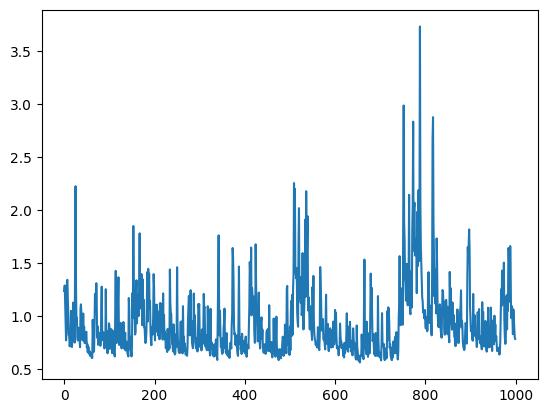

In [54]:
plt.plot(volat[:1000])

In [55]:
np.square(data[10])

0.3055612786869821

In [56]:
np.square(volat[10])

0.6810652398914602

In [ ]:
dataset= FIGARCHDataset(data, volat, truncation_size=truncation_size, scale = 100)

In [58]:
for i in range(3):
    print(dataset[i])

(tensor([2.3831e+00, 1.2142e+00, 5.3860e-01, 4.3070e-02, 5.4112e-01, 3.1784e+00,
        2.5902e+00, 1.2482e+00, 8.3314e-01, 1.2732e-01, 3.0556e-01, 7.2488e-05,
        2.6071e-01, 2.7644e-01, 1.6079e+00, 3.1709e-02, 7.9475e-02, 5.3455e-01,
        3.8994e-01, 2.0427e+00, 4.7071e-01, 1.1697e+00, 1.0838e-02, 4.2638e+00,
        1.0284e+01, 1.1078e-01, 4.8770e-02, 7.5925e-01, 5.3093e-03, 7.5489e-02,
        6.7194e-01, 5.6630e-01, 5.7842e-01, 1.1744e-01, 2.4610e-02, 1.7642e+00,
        1.5608e+00, 9.6865e-01, 6.5805e-01, 1.0077e-01, 3.6714e-01, 1.4095e+00,
        1.5931e-03, 8.3814e-01, 8.5562e-02, 2.4341e-01, 6.0651e-01, 5.8356e-01,
        6.0998e-01, 2.6623e-02, 2.9431e-01, 2.4556e-04, 2.7469e-01, 2.0341e-01,
        2.6440e-02, 1.6080e-01, 1.5739e-02, 1.5210e-01, 3.9148e-02, 9.5843e-02,
        1.2563e-02, 4.3203e-02, 1.4671e+00, 4.9000e-01, 2.1950e-05, 2.0152e-01,
        9.7484e-01, 2.5425e+00, 2.0520e+00, 1.0805e+00, 2.8345e+00, 1.0883e+00,
        1.5079e-03, 8.0346e-01, 1.5505e

In [59]:
len(dataset[0][0])

128

In [60]:
model = FIGARCHModel(truncation_size)
criterion = CorrectedNLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [61]:
dl = DataLoader(dataset, batch_size=128, shuffle=False, drop_last=False)

In [62]:
num_epochs = 100

for epochs in tqdm(range(num_epochs), desc="Training"):
    epoch_loss =0.0
    model.train()

    for inputs, resids in dl:
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, resids)
        loss.backward()
        optimizer.step()
        
        epoch_loss+=loss.item()

    avg_loss = epoch_loss/len(dl)
    

    
    tqdm.write(f"Epoch {epochs+1}/{num_epochs} | Loss: {avg_loss:.4f} | LR: {optimizer.param_groups[0]['lr']:.2e}")


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100 | Loss: 2.2406 | LR: 1.00e-03
Epoch 2/100 | Loss: 2.1980 | LR: 1.00e-03
Epoch 3/100 | Loss: 2.1495 | LR: 1.00e-03
Epoch 4/100 | Loss: 2.0928 | LR: 1.00e-03
Epoch 5/100 | Loss: 2.0249 | LR: 1.00e-03
Epoch 6/100 | Loss: 1.9398 | LR: 1.00e-03
Epoch 7/100 | Loss: 1.8261 | LR: 1.00e-03
Epoch 8/100 | Loss: 1.6530 | LR: 1.00e-03
Epoch 9/100 | Loss: 1.2505 | LR: 1.00e-03
Epoch 10/100 | Loss: 0.3436 | LR: 1.00e-03
Epoch 11/100 | Loss: 0.3050 | LR: 1.00e-03
Epoch 12/100 | Loss: 0.3005 | LR: 1.00e-03
Epoch 13/100 | Loss: 0.2992 | LR: 1.00e-03
Epoch 14/100 | Loss: 0.2986 | LR: 1.00e-03
Epoch 15/100 | Loss: 0.2984 | LR: 1.00e-03
Epoch 16/100 | Loss: 0.2982 | LR: 1.00e-03
Epoch 17/100 | Loss: 0.2982 | LR: 1.00e-03
Epoch 18/100 | Loss: 0.2981 | LR: 1.00e-03
Epoch 19/100 | Loss: 0.2981 | LR: 1.00e-03
Epoch 20/100 | Loss: 0.2981 | LR: 1.00e-03
Epoch 21/100 | Loss: 0.2981 | LR: 1.00e-03
Epoch 22/100 | Loss: 0.2981 | LR: 1.00e-03
Epoch 23/100 | Loss: 0.2981 | LR: 1.00e-03
Epoch 24/100 | Loss:

In [63]:
model_params = model.get_params()[::-1]

In [64]:
model_params 

array([0.40373993, 0.10514893, 0.04304163, 0.02540385, 0.01908546,
       0.01546154, 0.01373214, 0.01200754, 0.01024429, 0.01095175,
       0.00924008, 0.0091741 , 0.00905415, 0.0077664 , 0.0076153 ,
       0.0073591 , 0.00693053, 0.0066216 , 0.00499747, 0.00480634,
       0.00551845, 0.00570637, 0.00527003, 0.0045675 , 0.00445803,
       0.00441646, 0.00397981, 0.00494685, 0.00427447, 0.00444861,
       0.0036915 , 0.00391012, 0.00302396, 0.00361071, 0.00273354,
       0.00329725, 0.00312257, 0.00276584, 0.00318989, 0.00346584,
       0.00366207, 0.00274905, 0.00352574, 0.00285353, 0.0032221 ,
       0.00379598, 0.0039594 , 0.00436567, 0.00336522, 0.00389314,
       0.00407089, 0.00349024, 0.002883  , 0.0036513 , 0.00381198,
       0.00385346, 0.00420082, 0.0039247 , 0.00348419, 0.00370212,
       0.0049346 , 0.00435985, 0.00322043, 0.00314398, 0.00302123,
       0.00349836, 0.00327569, 0.00316509, 0.0032243 , 0.00548622,
       0.00373161, 0.0051859 , 0.00489303, 0.00414271, 0.00332

In [65]:
compute_lambda_sequence(d, phi, beta, truncation_size)

array([4.00000000e-01, 1.45000000e-01, 8.10000000e-02, 5.08625000e-02,
       3.47900000e-02, 2.54760625e-02, 1.96545375e-02, 1.57657460e-02,
       1.30213498e-02, 1.09979272e-02, 9.45362924e-03, 8.24213469e-03,
       7.27031363e-03, 6.47628228e-03, 5.81741011e-03, 5.26343050e-03,
       4.79230088e-03, 4.38761535e-03, 4.03693154e-03, 3.73065669e-03,
       3.46128678e-03, 3.22287529e-03, 3.01065492e-03, 2.82076347e-03,
       2.65004206e-03, 2.49588454e-03, 2.35612360e-03, 2.22894365e-03,
       2.11281340e-03, 2.00643331e-03, 1.90869403e-03, 1.81864348e-03,
       1.73546037e-03, 1.65843293e-03, 1.58694154e-03, 1.52044455e-03,
       1.45846663e-03, 1.40058907e-03, 1.34644179e-03, 1.29569657e-03,
       1.24806143e-03, 1.20327583e-03, 1.16110667e-03, 1.12134479e-03,
       1.08380205e-03, 1.04830882e-03, 1.01471178e-03, 9.82872051e-04,
       9.52663563e-04, 9.23971648e-04, 8.96691797e-04, 8.70728584e-04,
       8.45994715e-04, 8.22410205e-04, 7.99901635e-04, 7.78401509e-04,
      

In [66]:
fit_figarch_parameters(model_params[:5])

(1.0000999998e-06, 0.4823405454825473, 1.0002508612645016e-06)